<h1><center><font color = "red">Jupyter Notebook for Convolutional Neural Network Implementation in Keras</font></center></h1>

## Dataset Information:

•	Let us take a very famous dataset for handwritten digit classification called as MNIST (Modified National Institue of Standards and Technology) dataset

•	It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. 
The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

<h3><center><font color = "red">MNIST Dataset Example</font></center></h3>

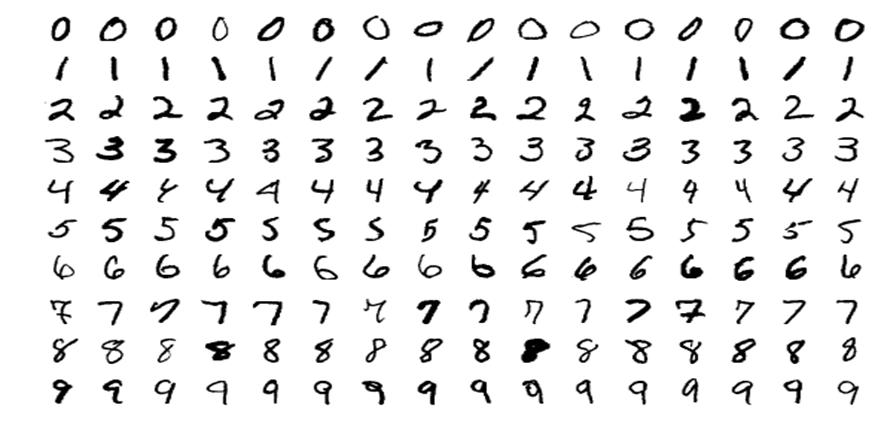

## Step 1. Loading Dataset from Keras

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2023-10-05 14:54:34.505190: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 1s 0us/step


In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Step 2. Visualizing Few Digits from MNIST Dataset

In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


#### From the above cell it is inferred that the input images are stored in Numpy tensors of shape (60000, 28, 28) for training data and of shape (10000, 28, 28) for test data, respectively.

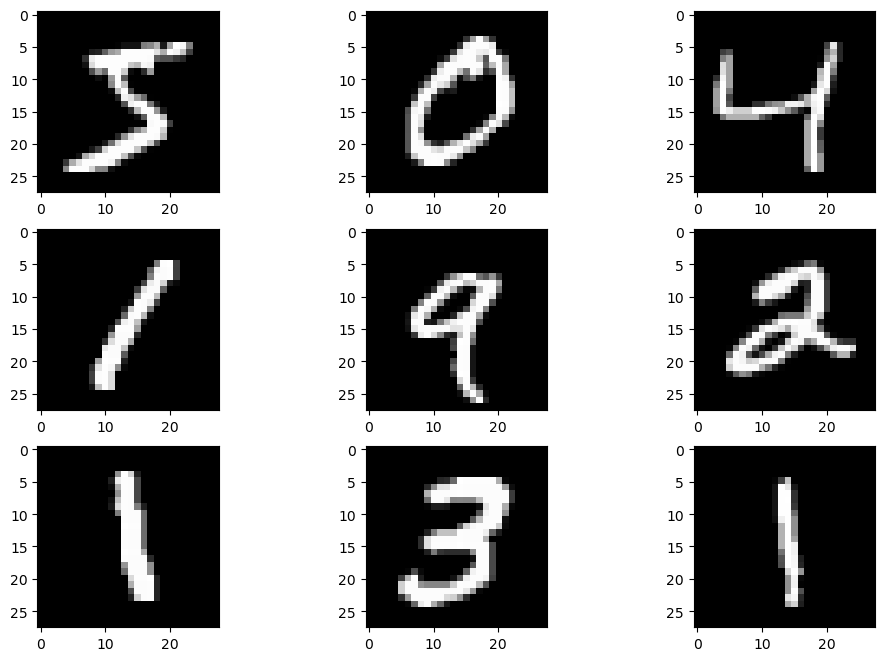

In [4]:
fig=plt.figure(figsize=(12,8), dpi= 100)
# plot first nine images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    
# show the figure
plt.show()

## Step 3. Defining Model Using Keras

In [9]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Importantly, a convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension). In this case, we’ll configure the convnet to process inputs of size (28, 28, 1), which is the format of MNIST images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first layer.

#### Let’s display the architecture of the convnet so far:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

#### You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64).

#### The next step is to feed the last output tensor (of shape (3, 3, 64)) into a densely connected classifier network like those you’re already familiar with: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. First we have to flatten the 3D outputs to 1D, and then add a few Dense layers on top.

## Step 4. Adding Classifier on Top of the Convnet

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We’ll do 10-way classification, using a final layer with 10 outputs and a softmax activation.
Here’s what the network looks like now:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

As you can see, the (3, 3, 64) outputs are flattened into vectors of shape (576,)
before going through two Dense layers.

Let us train the Convnet on the MNIST digits.

## Step 5. Compiling Model

In [13]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
# compiling model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Step 6. Fitting Model on Training Data

In [15]:
# fitting model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1797 - accuracy: 0.9442
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0483 - accuracy: 0.9847
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0333 - accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0241 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 17s 19ms/step - loss: 0.0188 - accuracy: 0.9944


## Step 7. Model Evaluation on Test Data

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0275 - accuracy: 0.9905
Test loss: 0.027478894218802452
Test accuracy: 0.9904999732971191


## NOT BAD :)

## Task for you:

### Develop a CNN model to classify images into predefined categories using Keras.

#### Dataset:
Use the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

Data Link: https://www.cs.toronto.edu/~kriz/cifar.html

In [51]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [52]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


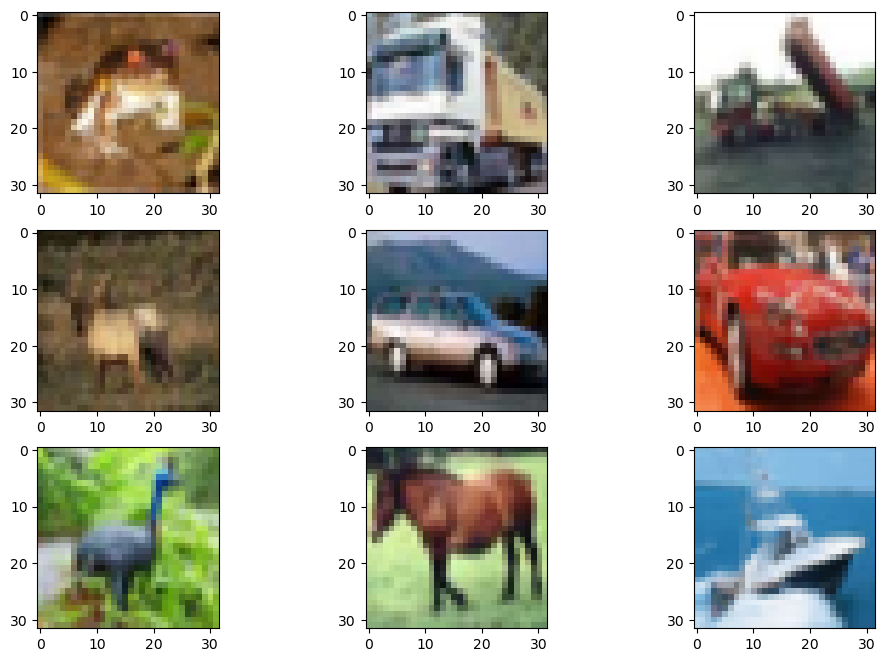

In [53]:
fig=plt.figure(figsize=(12,8), dpi= 100)
# plot first nine images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
    
# show the figure
plt.show()

In [40]:
modelCifar = models.Sequential()
modelCifar.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelCifar.add(layers.MaxPooling2D((2, 2)))
modelCifar.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelCifar.add(layers.MaxPooling2D((2, 2)))
modelCifar.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelCifar.add(layers.Flatten())
modelCifar.add(layers.Dense(128, activation='relu'))
modelCifar.add(layers.Dense(10, activation='softmax'))

modelCifar.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 flatten_3 (Flatten)         (None, 2048)             

In [54]:
x_train = x_train.reshape((50000, 32, 32, 3))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 32, 32, 3))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [42]:
# compiling model
modelCifar.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# fitting model
modelCifar.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 47s 60ms/step - loss: 1.0241 - accuracy: 0.6418
Epoch 2/5
782/782 [==============================] - 43s 55ms/step - loss: 0.8493 - accuracy: 0.7044
Epoch 3/5
782/782 [==============================] - 43s 55ms/step - loss: 0.7229 - accuracy: 0.7494
Epoch 4/5
782/782 [==============================] - 46s 58ms/step - loss: 0.6164 - accuracy: 0.7873
Epoch 5/5
782/782 [==============================] - 44s 57ms/step - loss: 0.5203 - accuracy: 0.8185


In [46]:
test_lossCifar, test_accCifar = modelCifar.evaluate(x_test, y_test)
print("Test loss:", test_lossCifar)
print("Test accuracy:", test_accCifar)

313/313 [==============================] - 2s 6ms/step - loss: 1.0318 - accuracy: 0.6782
Test loss: 1.0318268537521362
Test accuracy: 0.6782000064849854
